# Pair programming Beautiful Soup

Enunciado: Escribe una función llamada `scrape_coches_ocasion` que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la [siguiente](https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular) url.

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará `None`.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

    - "coche": Nombres de los coches.

    - "precio_rebajado": Precios rebajados.

    - "precio_original": Precios originales.

    - "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El *DataFrame* debe tener un aspecto parecido a este:

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url_coches = "https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular"

# hacemos la request a la página de la que queremos sacar la info
res_coches = requests.get(url_coches)

# vemos si todo ha ido bien
print("La respuesta de la petición es:", res_coches.status_code)

La respuesta de la petición es: 200


<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="image" href="/hera/icons/home.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/>
  <link as="image" href="/hera/icons/ribbon.svg" rel="preload"/>
  <link as="image" href="/hera/icons/favourite.svg" rel="preload"/>
  <link as="image" href="/hera/icons/C.svg" rel="preload"/>
  <link as="image" href="/hera/icons/0_EMISIONES.svg" rel="preload"/>
  <link as="image" fetchpriority="high" href="/hera/icons/adSell.svg" rel="preload"/>
  <link as="image" href="/hera/icons/B.svg" rel="pr
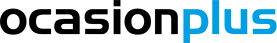

In [4]:
# creamos el objeto BeautifulSoup para poder acceder al contenido solicitado
sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')
print(sopa_coches.prettify())

- Coche
- Precio Rebajado
- Precio Original
- Kilómetros

In [13]:
# ERROR
# extraigo nombre y modelo pero me falta un espacio entre ambos
# lista_nombre = sopa_coches.find_all("h2", {"class": "cardVehicle_column_text__EvQkB"})
# print(lista_nombre[5].getText())

In [27]:
# OPCION DE RAQUEL
# Seleccionar los nombres y los modelos de los coches usando el selector CSS específico
lista_nombre = sopa_coches.select('h2 > span.cardVehicle_spot__e6YZx')
print(lista_nombre[5].getText())
lista_modelo = sopa_coches.select('h2 > span.cardVehicle_finance__SG6JV')
print(lista_modelo[5].getText())

Audi A3
Sportback 30 TDI S line S-tronic 85 kW (116 CV)


In [28]:
# cojo solo los textos
lista_nombre_texto =[]

for i in lista_nombre:
    lista_nombre_texto.append(i.getText())
    
print(lista_nombre_texto)

lista_modelo_texto =[]

for i in lista_modelo:
    lista_modelo_texto.append(i.getText())
    
print(lista_modelo_texto)

['Dacia Duster', 'Skoda Fabia', 'Audi A3', 'BMW Serie 1', 'Fiat 500', 'Audi A3', 'Seat León', 'Mercedes Clase A', 'Volkswagen Golf', 'Opel Astra', 'KIA Stonic', 'Volkswagen Golf', 'Hyundai i30', 'Ford Focus', 'Peugeot 3008', 'Peugeot 3008', 'Lexus RX', 'Citroën C3', 'Seat León', 'Hyundai i30']
['SL Aniversario TCE 4X2 GPF (150 CV)', '1.2 Urban 51 kW (69 CV)', 'Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic', '116d (116 CV) Pack M', '1.2 8v Lounge (69 CV)', 'Sportback 30 TDI S line S-tronic 85 kW (116 CV)', '1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)', 'Mercedes-Benz A 200 d 110 kW (150 CV)', 'Sport 2.0 TDI CR BMT (150 CV) DSG', '2.0 CDTi S&S Selective (165 CV)', '1.2 CVVT Eco-Dynamics Drive (84 CV)', '1.5 TSI Evo (130 CV)', '1.6 CRDI GLS Style (128 CV)', '1.5 Ecoblue ST-Line X  (120 CV)', 'SUV SUV PureTech 130 Allure EAT8 (130 CV)', 'SUV 1.5 BlueHDi  (130CV) S&S Allure', '450h Luxury  (313 CV)', 'PureTech 110 S&S Feel EAT6 (110 CV)', '2.0 TFSI S&S Cupra DSG-7 (290 CV

In [29]:
# compruebo que hay el mismo numero de elementos en la lista de nombres y en la de modelos
print(len(lista_nombre_texto))
print(len(lista_modelo_texto))

20
20


In [30]:
# compruebo como podría unir nombre y modelo de un coche
nombre_modelo = lista_nombre[0].getText() + " " + lista_modelo[0].getText()
nombre_modelo

'Dacia Duster SL Aniversario TCE 4X2 GPF (150 CV)'

In [45]:
# combino nombre y modelo de todos los coches en una lista unica

nombre_completo = []
for nom in range(0, len(lista_nombre)):
    nombre_completo.append(lista_nombre[nom].getText() + " " + lista_modelo[nom].getText())
    
nombre_completo

['Dacia Duster SL Aniversario TCE 4X2 GPF (150 CV)',
 'Skoda Fabia 1.2 Urban 51 kW (69 CV)',
 'Audi A3 Sportback TFSIe TFSIe S line 40 TFSI e 150 kW (204 CV) S tronic',
 'BMW Serie 1 116d (116 CV) Pack M',
 'Fiat 500 1.2 8v Lounge (69 CV)',
 'Audi A3 Sportback 30 TDI S line S-tronic 85 kW (116 CV)',
 'Seat León 1.4 TSI S&S ACT FR Plus DSG7 110 kW (150 CV)',
 'Mercedes Clase A Mercedes-Benz A 200 d 110 kW (150 CV)',
 'Volkswagen Golf Sport 2.0 TDI CR BMT (150 CV) DSG',
 'Opel Astra 2.0 CDTi S&S Selective (165 CV)',
 'KIA Stonic 1.2 CVVT Eco-Dynamics Drive (84 CV)',
 'Volkswagen Golf 1.5 TSI Evo (130 CV)',
 'Hyundai i30 1.6 CRDI GLS Style (128 CV)',
 'Ford Focus 1.5 Ecoblue ST-Line X  (120 CV)',
 'Peugeot 3008 SUV SUV PureTech 130 Allure EAT8 (130 CV)',
 'Peugeot 3008 SUV 1.5 BlueHDi  (130CV) S&S Allure',
 'Lexus RX 450h Luxury  (313 CV)',
 'Citroën C3 PureTech 110 S&S Feel EAT6 (110 CV)',
 'Seat León 2.0 TFSI S&S Cupra DSG-7 (290 CV)',
 'Hyundai i30 2.0 TGDI N Performance (280CV)']

In [51]:
# PRECIO REBAJADO
# selecciono los precios rebajados
precio_rebajado = sopa_coches.select('div.cardVehicle_amount__JGeQe > span.cardVehicle_finance__SG6JV')

#los guardare en una lista
precio_rebajado_texto = []

# itero por los precios originales sacados de la sopa y los limpio
for precio_r in precio_rebajado:
    
    precio_r = precio_r.getText() # cojo solo el texto
    precio_rebajado_texto.append(float(precio_r.replace(".", "").replace("€", ""))) # quito simbolos y lo convierto a float
        
precio_rebajado_texto

20

In [53]:
# compruebo el numero de precios rebajados
len(precio_rebajado_texto)

20

In [54]:
# PRECIO ORIGINAL
# selecciono los precios originales
precio_original = sopa_coches.select('div.cardVehicle_amount__JGeQe > span.cardVehicle_spot__e6YZx')

#los guardare en una lista
precio_original_texto = []

# itero por los precios originales sacados de la sopa y los limpio
for precio_o in precio_original:
    
    precio_o = precio_o.getText() # cojo solo el texto
    precio_original_texto.append(float(precio_o.replace(".", "").replace("€", ""))) # quito simbolos y lo convierto a float
        
precio_original_texto

[21790.0,
 32750.0,
 18900.0,
 20690.0,
 21990.0,
 23450.0,
 18890.0,
 13490.0,
 18450.0,
 25900.0,
 21450.0,
 21450.0,
 39500.0,
 13590.0,
 25190.0,
 33990.0]

In [55]:
# compruebo el numero de precios originales
len(precio_original_texto)

# me sale que hay menos de 20, si miramos en la web podemos comprobar que en los casos donde no hay precio original, es porque el que se muestra como rebajado es el original

16

In [72]:
# KM RECORRIDOS

info = sopa_coches.find_all("span", {"class": "characteristics_elements__Mb1S_"})

km_recorridos = []

# recorro los datos de la informacion extraida
for dato in info:
    # cojo el texto
    dato = dato.getText()
    # si contiene km se añade a la lista
    if "Km" in dato:
        km_recorridos.append(int(dato.replace(".", "").replace(" Km", ""))) # se limpia quitando puntos y km y se convierte a numero entero
    else:
        continue

km_recorridos

[16508,
 123018,
 68008,
 119962,
 97438,
 138216,
 115546,
 39718,
 149998,
 92295,
 37334,
 59106,
 67749,
 29883,
 42130,
 40287,
 43122,
 67475,
 49280,
 56976]

In [69]:
# compruebo que se corresponde con el numero de coches
len(km_recorridos)

20